<a href="https://colab.research.google.com/github/gastan81/A-B_testing/blob/main/3_confidence_intervals_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confidence intervals
Confidence intervals are a way of estimating the range within which a population parameter, like the average age of a population, is likely to fall based on a sample. For instance, if we take a sample of ages from a city's population and calculate a 95% confidence interval, we can say with 95% confidence that the true average age of the population lies within that interval.

While it may not seem remarkable initially, confidence intervals offer a powerful mechanism for fine-tuning the sensitivity of our estimates. They allow us to choose the level of confidence we desire – whether it's 90%, 95%, 99%, or any other percentage – regarding the accuracy of our estimate. If a value falls outside of the confidence interval, it tells us something significant. Statistically, it indicates the likelihood of such an occurrence: if we opt for a 95% confidence interval, for instance, we know that values falling outside that range should only happen 5% of the time. This empowers us to make informed decisions and draw conclusions with a quantifiable level of confidence.

---
## 1.&nbsp; Import libraries 💾

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
## 2.&nbsp; Central limit theorem, normal distribution, and confidence intervals 🔮
Up to this point, we have explored the central limit theorem, which reveals that when we draw samples from a population, compute their means, and depict their distributions, they tend to approximate the normal distribution. Furthermore, within the normal distribution, roughly 95% of the data falls within a range of 2 standard deviations from the mean. Consequently, when we take a sample, and calculate its mean and standard deviation, we gain the ability to assert with 95% confidence that the genuine population mean lies within an interval spanning approximately 2 standard deviations from the sample mean.

---
## 3.&nbsp; Confidence intervals 📏
Let's illustrate this concept by revisiting the data for WBS City 2 once more.

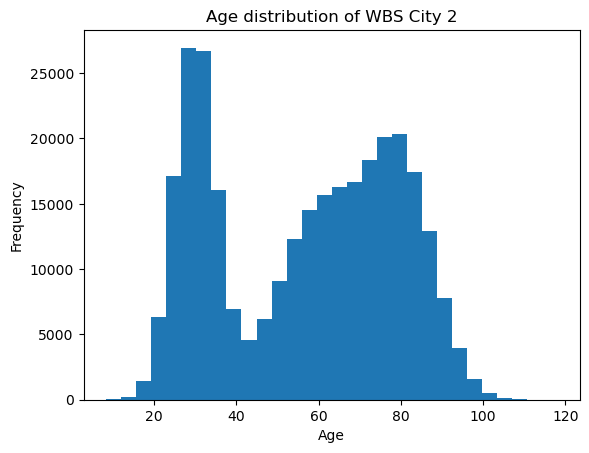

In [4]:
# Set the number of data points
num_points = 100000

# Define the parameters for each mode (mean and standard deviation)
modes = [
    {'mean': 30, 'std_dev': 5},
    {'mean': 60, 'std_dev': 10},
    {'mean': 80, 'std_dev': 8}
]

# np.random.seed(4321)
# Generate random numbers for each mode and concatenate them
ages = np.concatenate([np.random.normal(mode['mean'], mode['std_dev'], num_points) for mode in modes])

# Create a histogram to visualise the distribution
plt.hist(ages, bins=30)
plt.title("Age distribution of WBS City 2")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### 3.1.&nbsp; Standard error

The normal distribution is based on the distribution of sample means. It tells us that, if we were to take many samples of the same size from the same population and calculate the mean of each sample, the distribution of those sample means would be approximately normal. **The standard deviation of this distribution of sample means is called the standard error.**

We use the sample mean and standard error to construct confidence intervals because the normal distribution has some useful properties. For example, we know that approx. 95% of the values in a normal distribution fall within 2 standard deviations of the mean. This means that if we construct a confidence interval with a width of 2 standard errors, we can be approx. 95% confident that the population mean lies within that interval.

Calculating the standard error (SE) from a sample is straightforward, using the formula:

\begin{align}
\text{Standard Error (SE)} = \frac{\text{s}}{\sqrt{n}}
    \end{align}

Where:
- $\text{s}$ is the sample standard deviation.
- $n$ is the sample size.

This formula tells us that the standard error is equal to the sample standard deviation divided by the square root of the sample size. As the sample size increases, the standard error decreases. This means that larger samples are more likely to produce sample means that are close to the population mean.

Now, we'll take a sample, determine the mean, and compute the standard error as we begin the construction of our confidence interval.

In [5]:
ages_series = pd.Series(ages)

sample_size = 500

sample_series = ages_series.sample(n = sample_size, replace = True)#, random_state = 4321)

sample_mean = sample_series.mean()
sample_std_dev = sample_series.std()

standard_error = sample_std_dev / (sample_size**0.5)

### 3.2.&nbsp; Calculating the confidence interval using the standard error

Until now, we've stated that roughly 95% of normal distribution values are within 2 standard errors of the mean, though it's more precise to note that 95% fall within 1.96 standard errors. We'll use 1.96 in the the construction of our confidence inteval.

To establish the upper boundary of our interval, we simply add 1.96 times the standard error to the sample mean, and for the lower boundary, we subtract 1.96 times the standard error from the sample mean.
> **Note:** When using the normal distribution, the number of standard errors away from the mean is also known as a z-score. The z-score is a value that we can look up in a z-table to find the number of standard errors that correspond to a given confidence level.

In [6]:
upper_boundary = sample_mean + (1.96 * standard_error)
lower_boundary = sample_mean - (1.96 * standard_error)

print(f"We are 95% confident that the true population mean lies between {lower_boundary:.2f} and {upper_boundary:.2f}.")

We are 95% confident that the true population mean lies between 56.44 and 60.35.


Fantastic! We've created our first confidence interval. Let's see how this looks on the histogram.

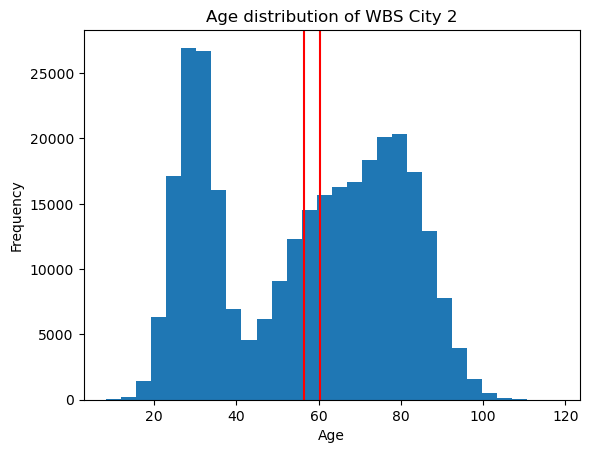

In [7]:
# Create a histogram to visualise the distribution
plt.hist(ages, bins=30)
plt.title("Age distribution of WBS City 2")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Create vertical lines for the lower and upper bounds of the confidence interval
plt.axvline(x=lower_boundary, color='red')
plt.axvline(x=upper_boundary, color='red')

plt.show()

We are 95% confident that the true mean age of WBS City 2 lies within this boundary.

#### Challenge 1:
For this challenge, your goal is to compute the boundaries for a 99% confidence interval using the same sample. To reach this confidence level, a brief online search may be necessary to determine the number of standard errors required.

We are 99% confident that the true population mean lies between 55.83 and 60.96.


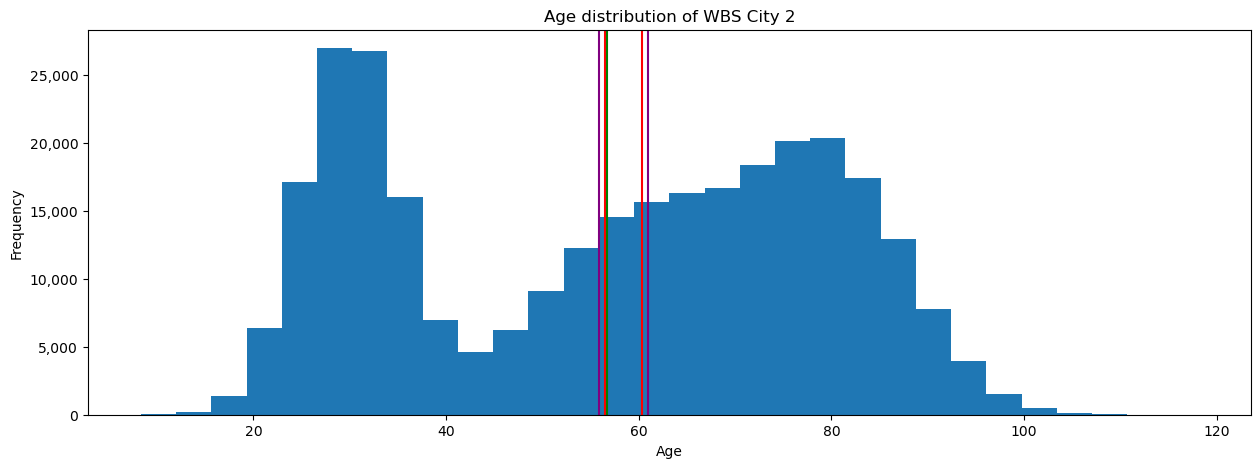

In [8]:
from matplotlib.ticker import FuncFormatter
# With every line of code, you're making progress
upper_boundary_99 = sample_mean + (2.576 * standard_error)
lower_boundary_99 = sample_mean - (2.576 * standard_error)
print(f"We are 99% confident that the true population mean lies between {lower_boundary_99:.2f} and {upper_boundary_99:.2f}.")
# Create a histogram to visualise the distribution
plt.figure(figsize=(15, 5))
plt.hist(ages, bins=30)
plt.title("Age distribution of WBS City 2")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Create vertical lines for the lower and upper bounds of the confidence interval
plt.axvline(x=lower_boundary, color='red')
plt.axvline(x=upper_boundary, color='red')
plt.axvline(x=lower_boundary_99, color='purple')
plt.axvline(x=upper_boundary_99, color='purple')
plt.axvline(x=ages_series.mean(), color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

### 3.3.&nbsp; Validation of our confidence interval

In this section, we have the unique opportunity to validate our confidence boundary through a slight "cheat." In typical scenarios, the true average of a population is unknown. Sampling is a way to estimate this average when dealing with vast, costly, or complex populations. As a result, we generally do not have access to the genuine population values.

However, in our current situation, where we've generated synthetic data, we can calculate the mean of all the ages and determine whether it falls within our defined confidence boundary.

In [9]:
ages_series_mean = ages_series.mean()

if lower_boundary < ages_series_mean < upper_boundary:
    print("The actual population mean is within the boundaries")
else:
    print("The actual population mean is NOT within the boundaries")

The actual population mean is within the boundaries


We can also visualise this to get a better idea of what's happening.

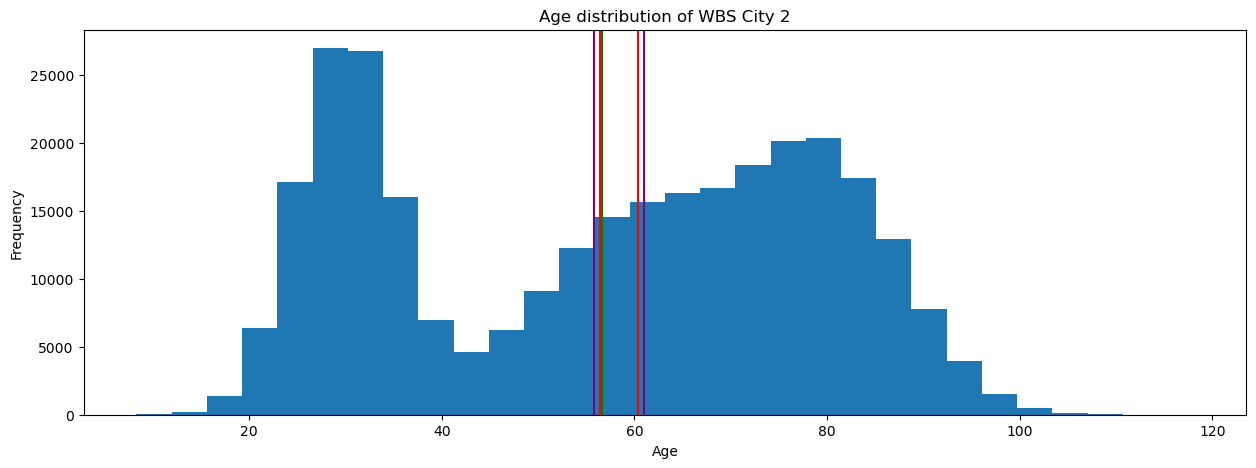

In [10]:
# Create a histogram to visualise the distribution
plt.figure(figsize=(15, 5))
plt.hist(ages, bins=30)
plt.title("Age distribution of WBS City 2")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Create vertical lines for the lower and upper bounds of the confidence interval
plt.axvline(x=lower_boundary, color='red')
plt.axvline(x=upper_boundary, color='red')
plt.axvline(x=lower_boundary_99, color='purple')
plt.axvline(x=upper_boundary_99, color='purple')

# Create vertical line for the population mean
plt.axvline(x=ages_series_mean, color='green')

plt.show()

#### Challenge 2:

Imagine you're in charge of a chocolate factory that has just acquired a new machine. This machine claims to produce chocolate bars weighing 50 grams each. However, you have your suspicions that the machine may not be working as advertised, and the chocolate bars might not weigh 50 grams on average. To investigate, you decide to take a sample from the machine's output.

Calculate a 95% confidence interval for the sample of chocolate bar weights below. Does the stated average of 50 grams fall within your confidence interval? Can you be 95% confident that, on average, this machine is producing chocolate bars weighing 50 grams?

In [11]:
chocolate_sample_weights = [46.64, 47.8, 47.83, 52.55, 52.45, 48.24, 45.03, 49.31, 46.29, 48.66, 47.18, 49.5, 49.37, 45.61, 47.57, 47.38, 45.06, 51.1, 51.52, 47.47, 46.57, 49.56, 45.93, 51.43, 50.11, 52.26, 51.23, 46.83, 49.43, 52.16, 46.09, 48.76, 47.44, 48.6, 52.68, 45.77, 49.4, 49.79, 49.92, 47.35, 51.65, 48.18, 52.29, 48.98, 47.22, 51.59, 49.27, 47.41, 49.0, 50.65, 45.48, 47.12, 49.85, 46.61, 52.13, 51.78, 45.84, 50.78, 50.04, 45.0, 50.4, 48.95, 45.55, 48.15, 50.33, 52.81, 46.54, 52.42, 48.73, 48.57, 50.14, 48.37, 45.96, 52.84, 52.04, 47.28, 52.0, 46.77, 49.08, 48.08, 51.17, 47.89, 50.3, 52.94, 45.9, 47.6, 48.05, 46.35, 51.71, 49.76, 45.8, 49.53, 45.39, 48.89, 49.72, 46.8, 50.88, 52.78, 49.66, 45.51, 48.34, 51.81, 46.73, 52.49, 51.07, 50.01, 47.73, 48.28, 48.12, 45.74, 51.94, 50.27, 52.58, 48.47, 50.37, 52.1, 46.45, 47.76, 47.51, 48.63, 47.09, 48.82, 46.22, 50.2, 47.06, 46.0, 51.3, 51.68, 46.7, 52.65, 48.02, 50.46, 45.67, 49.21, 51.2, 50.08, 47.31, 45.58, 52.23, 48.69, 49.82, 52.33, 51.01, 46.96, 51.62, 47.54, 51.04, 49.63, 49.11, 50.56, 52.07, 49.59, 47.86, 51.55, 46.12, 51.97, 45.16, 47.99, 46.03, 50.17, 49.69, 52.39, 45.87, 45.29, 49.98, 52.71, 49.95, 45.64, 50.82, 45.13, 47.15, 50.94, 47.92, 51.49, 51.75, 47.25, 50.53, 52.36, 51.36, 49.47, 50.49, 46.06, 51.88, 49.34, 46.9, 48.44, 46.41, 45.42, 46.86, 52.52, 47.02, 52.74, 51.91, 47.96, 45.32, 46.32, 45.19, 50.59, 45.71, 48.92, 49.24, 46.51, 50.91, 51.14, 50.98, 48.31, 45.22, 46.99, 46.19, 51.27, 51.39, 48.53, 52.87, 46.38, 45.35, 46.25, 51.46, 45.26, 50.62, 45.1, 50.85, 51.84, 46.16, 46.93, 46.67, 52.9, 50.43, 49.14, 50.75, 48.5, 46.48, 48.86, 51.33, 48.41, 52.97, 47.67, 50.72, 52.61, 48.21, 49.02, 52.2, 48.79, 47.7, 45.45, 50.24, 49.05, 49.18, 50.69, 49.88, 47.63]

In [12]:
# Get coding, and watch those problems turn into achievements

# The average weight is not good enough metric, the share of chocolates within accepted minimum and maximum weight criteria is. However,...
choco_df = pd.DataFrame(chocolate_sample_weights, columns=['weight'])

choco_mean = choco_df['weight'].mean()
choco_std_dev = choco_df['weight'].std()
choco_size = len(chocolate_sample_weights)
choco_std_err = choco_std_dev / (choco_size**0.5)

print(f'choco_mean: {choco_mean}')
print(f'choco_std_dev: {choco_std_dev}')
print(f'choco_size: {choco_size}')
print(f'choco_sample_weights_standard_error: {choco_std_err}\n')

choco_upper_boundary_95 = choco_mean + (1.96 * choco_std_err)
choco_lower_boundary_95 = choco_mean - (1.96 * choco_std_err)

if choco_lower_boundary_95 < choco_mean < choco_upper_boundary_95:
    print("The machine is fine with at least 95% confidence")
else:
    print("The machine is bad with at least 95% confidence")

# The next question: What is the acual confidence?

choco_mean: 48.984
choco_std_dev: 2.3094932422816443
choco_size: 250
choco_sample_weights_standard_error: 0.14606517772754166

The machine is fine with at least 95% confidence
